## Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### Data Dictionary
1. Variable Name  :	Description
2. Holiday_Package :  Opted for Holiday Package yes/no?
3. Salary  :  Employee salary
4. age  :  Age in years
5. edu  :  Years of formal education
6. no_young_children. :  The number of young children (younger than 7 years)
7. no_older_children  :  Number of older children
8. foreign 	 foreigner. :  Yes/No

In [1]:
import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.style
%matplotlib inline 
import math
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')
my_colors = ['#d3d3d3','#d1a163','#7a7a7a','#d4a07d','#ffbf65','#202020']



## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [2]:
df=pd.read_csv("Holiday_Package.csv")

In [3]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [5]:
df.shape

(872, 8)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0


In [7]:
df_a=df.drop('Unnamed: 0',axis=1)

In [8]:
df_a

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes


In [9]:
dups = df_a.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df_a.shape)

Number of duplicate rows = 0
(872, 7)


In [10]:
df_a.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [11]:
df_a.rename(columns={'Holliday_Package':'Holiday_Package','age':'Age','educ':'Educ','no_young_children':'No_young_children','no_older_children':'No_older_children','foreign':'Foreign'},inplace=True)

In [12]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis,ax_skew)  =plt.subplots(nrows=3,sharex=True,gridspec_kw = {"height_ratios": (.55, 2,2)},figsize=(10, 7))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD AND SKEWNESS OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="#d3d3d3",ax=ax_box)
    ax_box.set(xlabel='')

    sns.despine(top=True,right=True,left=True) 
    sns.histplot(data,color='#d1a163',ax=ax_dis,kde=False)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='b', linestyle='-',linewidth=2)
    ax_dis.legend({'Mean':mean,'Median':median,'Mode':mode})
    
    sns.despine(top=True,right=True,left=True) 
    sns.distplot(data, color="m", kde=True,ax=ax_skew,label="Skewness : %.2f"%(data.skew()))
    ax_skew.legend(loc="best")
    plt.show()
    


In [13]:
df_a.columns


Index(['Holiday_Package', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

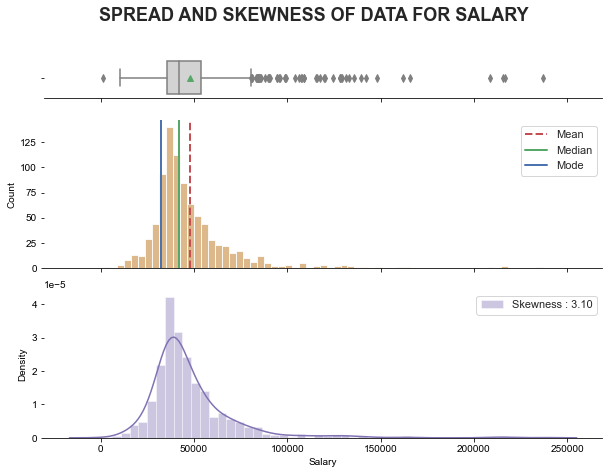

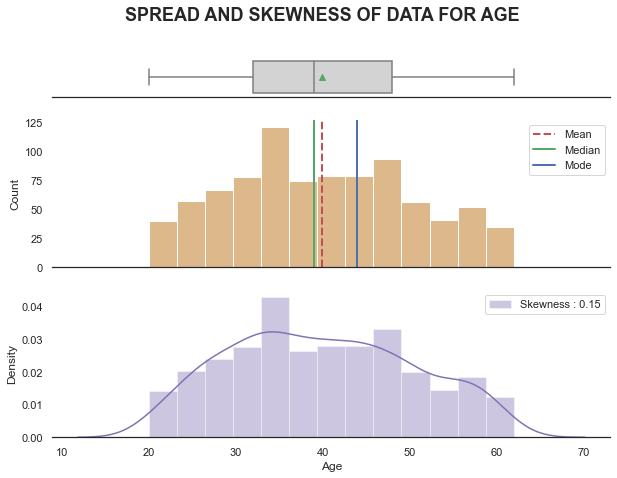

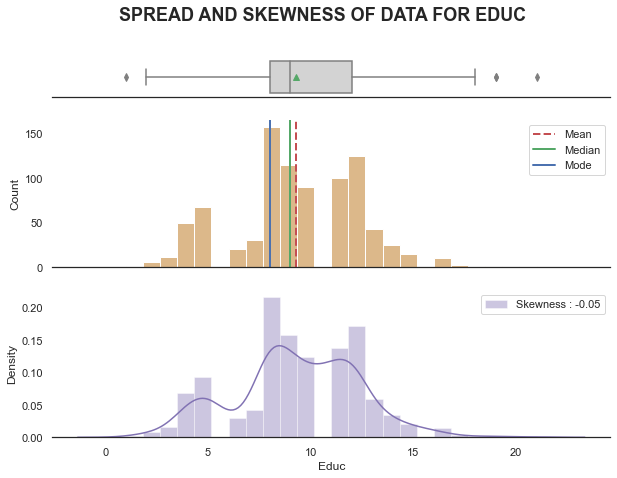

In [14]:
list_col=  ['Salary','Age', 'Educ']
for i in range(len(list_col)):
    dist_box(df_a[list_col[i]])

In [15]:
def contin_swarm(column):
    
    plt.figure(figsize=(10,6))
    sns.set(font_scale=1)
    print("Swarmplot of " + column)
    print("----------------------------------------------------------------------------")
    a=sns.swarmplot(data=df_a,x='Holiday_Package', y=df_a[column])
    plt.tight_layout
    plt.show()
    
    plt.figure(figsize=(10,6))
    print("Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(data = df_a, x='Holiday_Package',y=df_a[column])
    plt.show()    



In [16]:
lstcon = ['Salary','Age', 'Educ']
len(lstcon)

3

Swarmplot of Salary
----------------------------------------------------------------------------


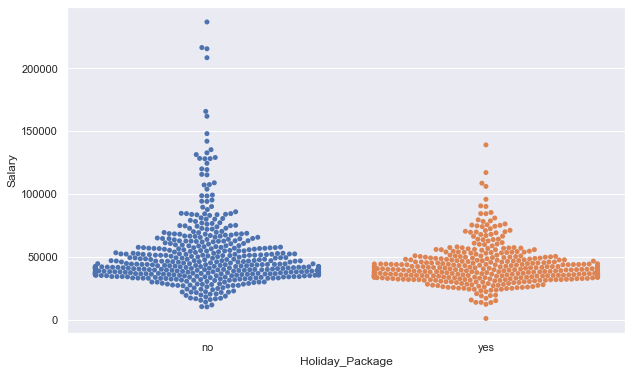

Boxplot of Salary
----------------------------------------------------------------------------


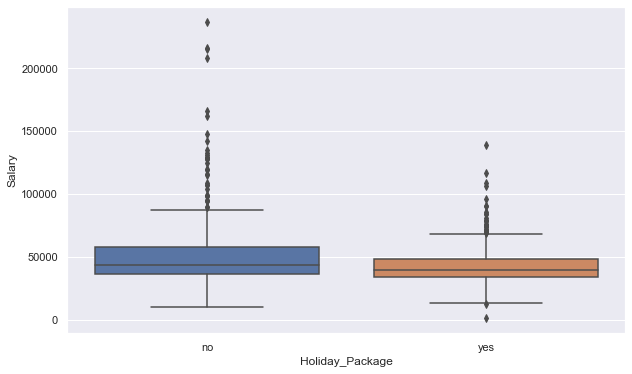

Swarmplot of Age
----------------------------------------------------------------------------


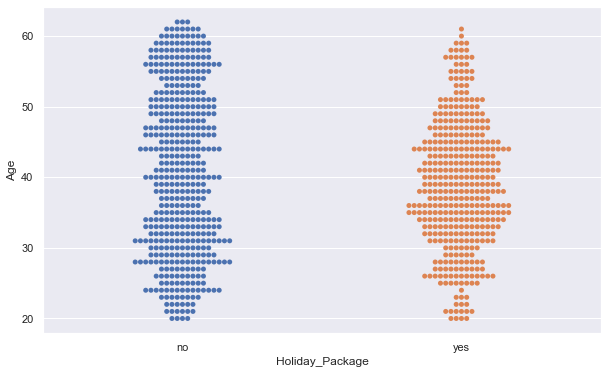

Boxplot of Age
----------------------------------------------------------------------------


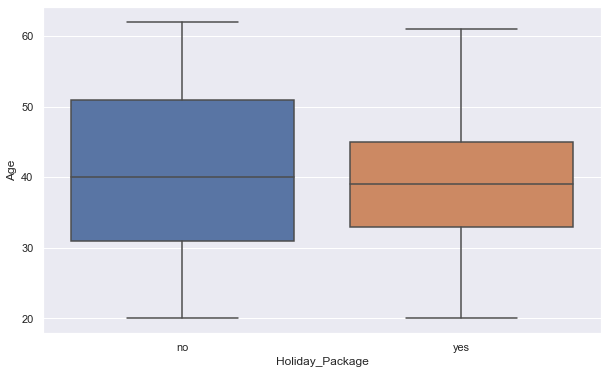

Swarmplot of Educ
----------------------------------------------------------------------------


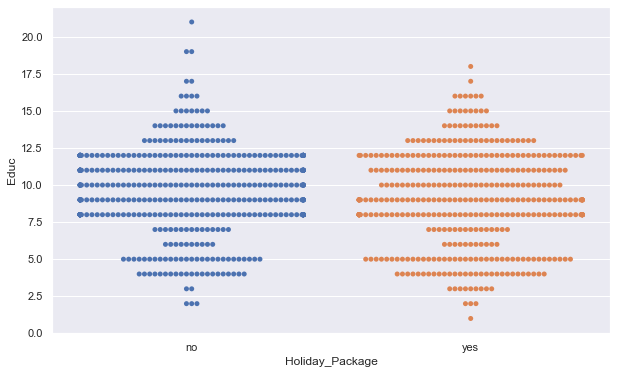

Boxplot of Educ
----------------------------------------------------------------------------


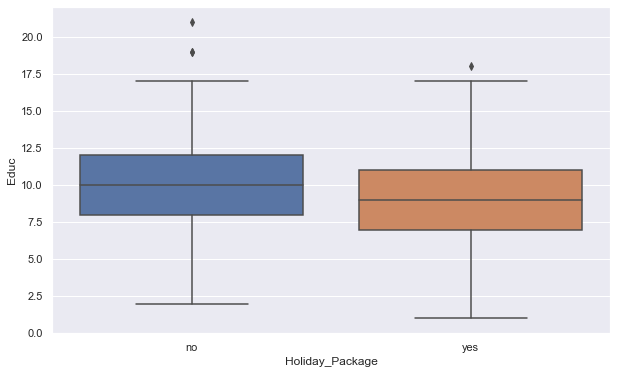

In [17]:
for x in lstcon:
    contin_swarm(x)

Countplot of Holiday Package


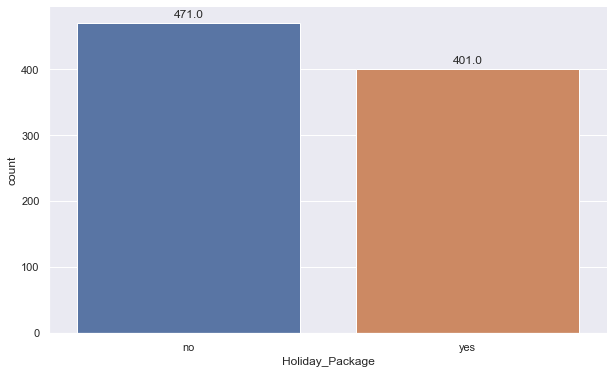

In [18]:
plt.figure(figsize=(10,6))
print("Countplot of Holiday Package")
a=sns.countplot(data = df_a,x=df_a['Holiday_Package'])
for bar in a.patches:
            a.annotate(format(bar.get_height(),'.1f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=12,xytext=(0,8),textcoords='offset pixels')
            a.spines['top'].set_visible(False)
            a.spines['right'].set_visible(False)
plt.tight_layout
plt.show()

In [19]:
def bivariateAnalysis_categorical1(column):
    
    plt.figure(figsize=(10,6))
    sns.set(font_scale=1)
    print("Countplot of " + column)
    print("----------------------------------------------------------------------------")
    a=sns.countplot(data = df_ct, x = df_ct[column])
    for bar in a.patches:
            a.annotate(format(bar.get_height(),'.1f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=10,xytext=(0,8),textcoords='offset pixels')
            a.spines['top'].set_visible(False)
            a.spines['right'].set_visible(False)
    plt.tight_layout
    plt.show()
  

In [20]:
def bivariateAnalysis_categorical(column):
    
    plt.figure(figsize=(10,6))
    sns.set(font_scale=1)
    print("Countplot of " + column)
    print("----------------------------------------------------------------------------")
    a=sns.countplot(data = df_ct, x = df_ct[column],hue=df_ct['Holiday_Package'])
    for bar in a.patches:
            a.annotate(format(bar.get_height(),'.1f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=10,xytext=(0,8),textcoords='offset pixels')
            a.spines['top'].set_visible(False)
            a.spines['right'].set_visible(False)
    plt.tight_layout
    plt.show()
    
    plt.figure(figsize=(10,6))
    print("Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(data = df_ct, x=df_ct[column],y=df_ct['Salary'],hue=df_ct['Holiday_Package'])
    plt.show()    

In [21]:
df_a.columns


Index(['Holiday_Package', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

In [22]:
df_ct = df_a
lstcatcolumns = ['No_young_children',
       'No_older_children', 'Foreign']
len(lstcatcolumns)

3

Countplot of No_young_children
----------------------------------------------------------------------------


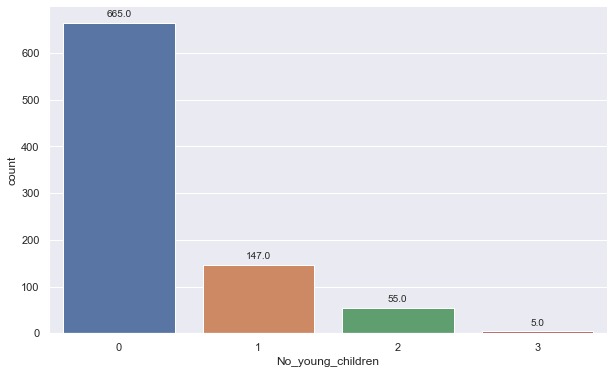

Countplot of No_older_children
----------------------------------------------------------------------------


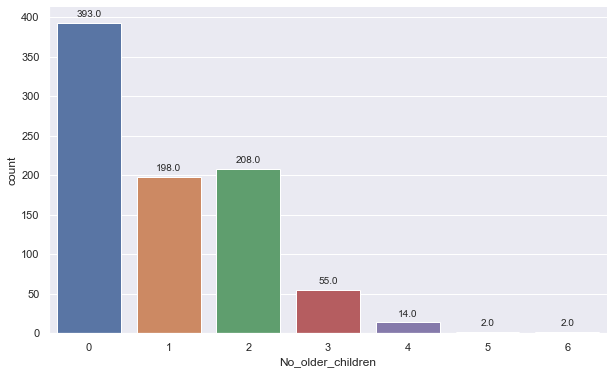

Countplot of Foreign
----------------------------------------------------------------------------


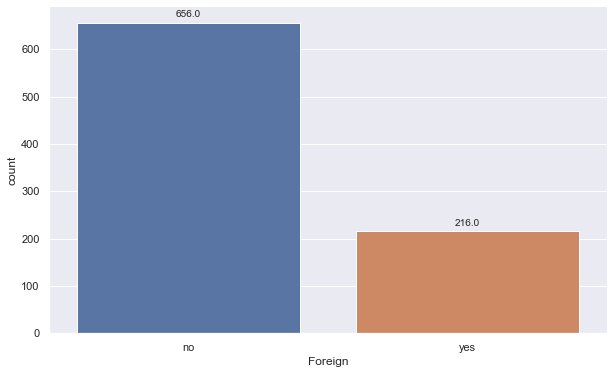

In [23]:
for x in lstcatcolumns:
    bivariateAnalysis_categorical1(x)

Countplot of No_young_children
----------------------------------------------------------------------------


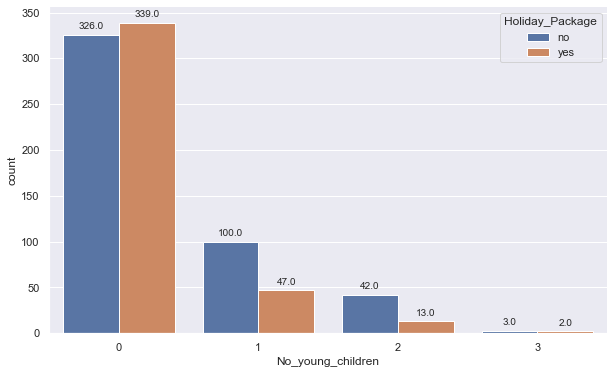

Boxplot of No_young_children
----------------------------------------------------------------------------


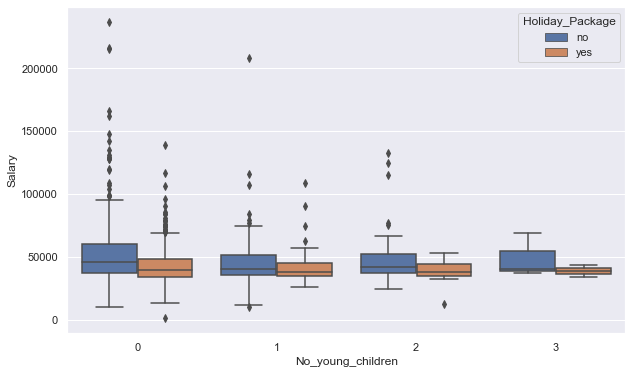

Countplot of No_older_children
----------------------------------------------------------------------------


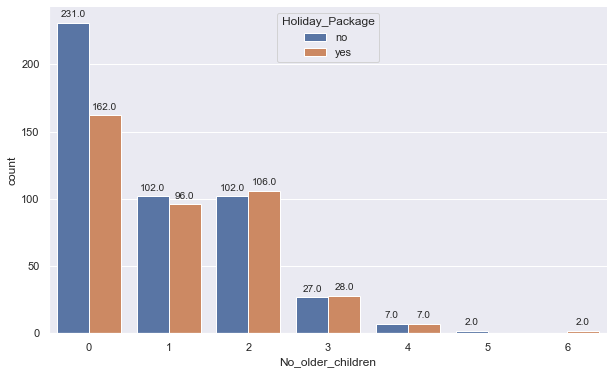

Boxplot of No_older_children
----------------------------------------------------------------------------


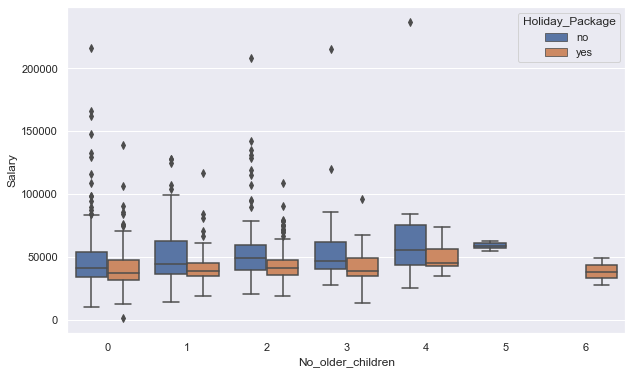

Countplot of Foreign
----------------------------------------------------------------------------


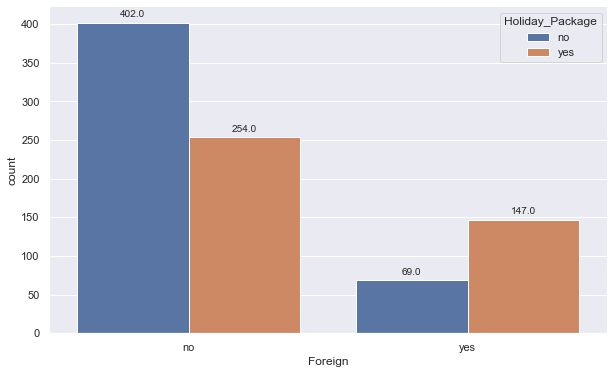

Boxplot of Foreign
----------------------------------------------------------------------------


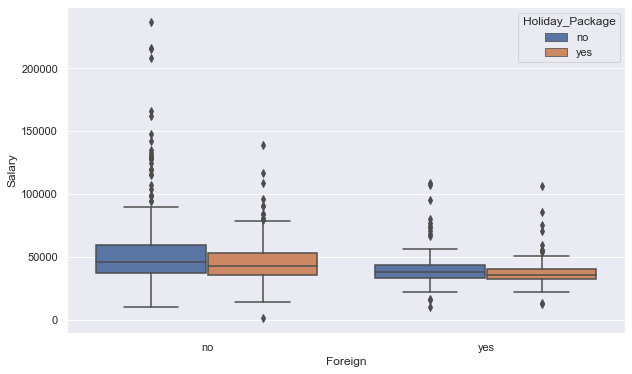

In [24]:
for x in lstcatcolumns:
    bivariateAnalysis_categorical(x)

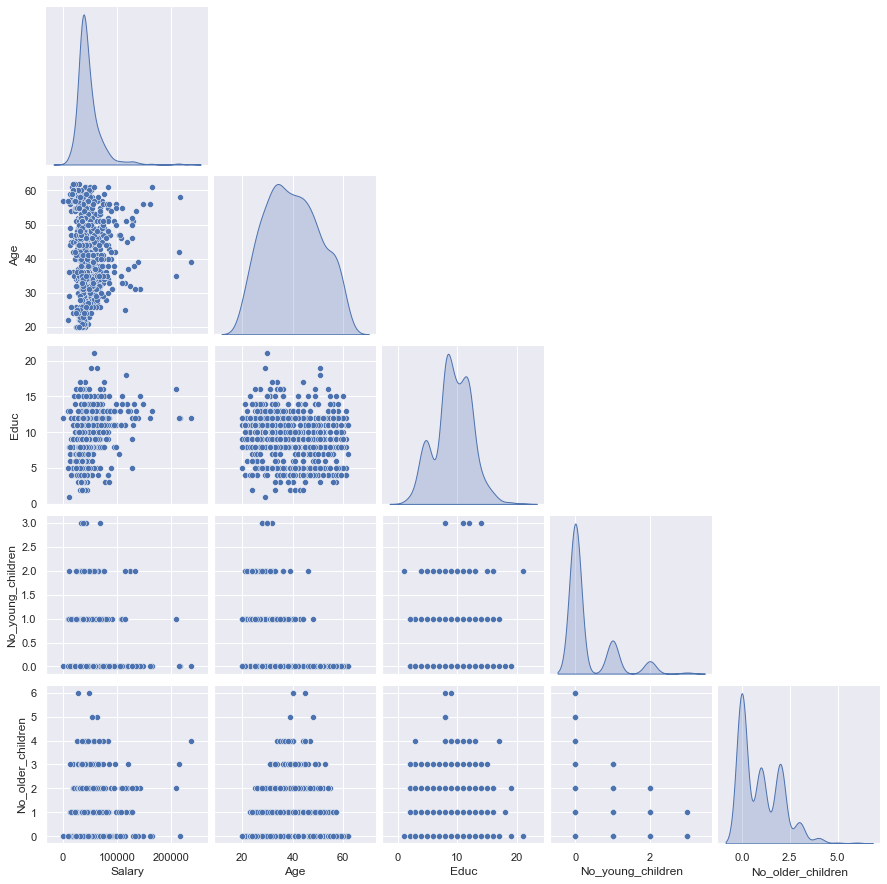

In [25]:
sns.pairplot(data=df_a,diag_kind='kde',corner=True)

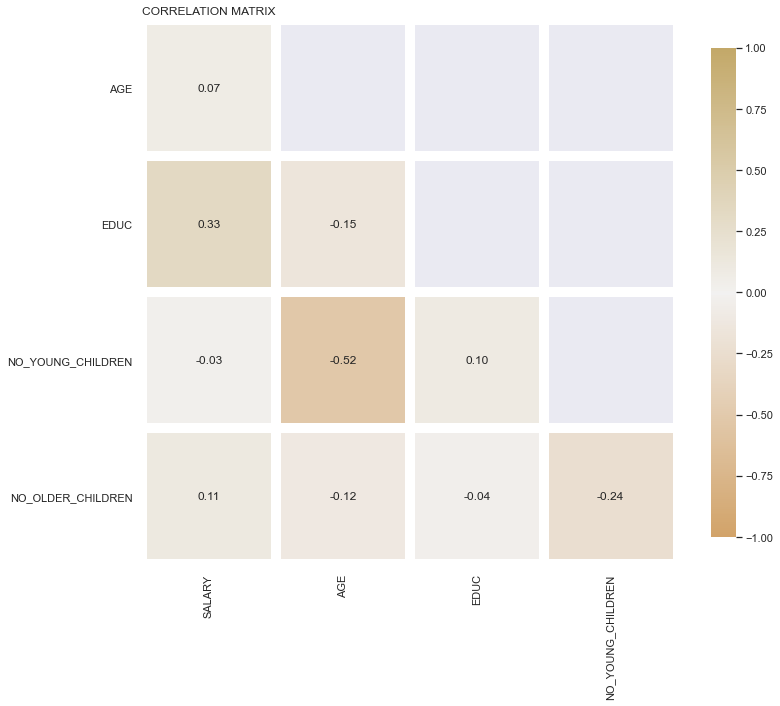

In [26]:
corr=df_a.corr()

items = df_a[df_a.columns[:df_a.columns.size]]
items_corr=items.corr()


fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(items_corr, dtype=bool))
mask = mask[1:, :-1]
corr = items.corr().iloc[1:,:-1].copy()

cmap1 = sns.diverging_palette(51,65, 62,70, as_cmap=True)

_=sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=9, cmap=cmap1, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .9}, square=False)
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0
           
          )
plt.xticks(plt.xticks()[0], labels=xticks,rotation=90)
title = 'CORRELATION MATRIX';
plt.title(title, fontsize=12,loc='left');




In [27]:
df_a['Holiday_Package']=np.where(df_a['Holiday_Package'] =='yes', '1', df_a['Holiday_Package'])
df_a['Holiday_Package']=np.where(df_a['Holiday_Package'] =='no', '0', df_a['Holiday_Package'])

In [28]:
df_a['Foreign']=np.where(df_a['Foreign'] =='yes', '1', df_a['Foreign'])
df_a['Foreign']=np.where(df_a['Foreign'] =='no', '0', df_a['Foreign'])

In [29]:
df_a['Holiday_Package'] = df_a['Holiday_Package'].astype('int64')
df_a['Foreign'] = df_a['Foreign'].astype('int64')

In [30]:
df_a.dtypes

Holiday_Package      int64
Salary               int64
Age                  int64
Educ                 int64
No_young_children    int64
No_older_children    int64
Foreign              int64
dtype: object

for feature in df_a.columns: 
    if df_a[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_a[feature].unique()))
        print(pd.Categorical(df_a[feature].unique()).codes)
        df_a[feature] = pd.Categorical(df_a[feature]).codes

def outliers(data):
        outliers_num = data.loc[:,data.columns != 'class']
        Q1 = outliers_num.quantile(0.25)
        Q3 =  outliers_num.quantile(0.75)
        IQR = Q3-Q1
        count = 0
        
        outliers_num_test = ((outliers_num <(Q1-1.5 * IQR)) | (outliers_num > (Q3+1.5 * IQR)))
        for col in outliers_num_test:
            if(1 in outliers_num_test[col].value_counts().index):
                print ("No. of outliers in %s: %d"% (col,outliers_num_test[col].value_counts().iloc[1]))
                count +=1
        print("\n\nNo of attributes with outliers are :", count)
outliers(df_a)

df_a.columns

#Checking the outliers
plt.figure(figsize = (12,15))
feature_list = ['Holiday_Package', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign']
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_a[feature_list[i]], data = df_a)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   


#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df_a[i])
    df_a[i] = np.where(df_a[i] > UL, UL, df_a[i])
    df_a[i] = np.where(df_a[i] < LL, LL, df_a[i])

#Check to verify if outliers have been treated
plt.figure(figsize = (12,15))

for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_a[feature_list[i]], data = df_a)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#verifying the outliers treatment
def outliers(data):
        outliers_num = data.loc[:,data.columns != 'class']
        Q1 = outliers_num.quantile(0.25)
        Q3 =  outliers_num.quantile(0.75)
        IQR = Q3-Q1
        count = 0
        
        outliers_num_test = ((outliers_num <(Q1-1.5 * IQR)) | (outliers_num > (Q3+1.5 * IQR)))
        for col in outliers_num_test:
            if(1 in outliers_num_test[col].value_counts().index):
                print ("No. of outliers in %s: %d"% (col,outliers_num_test[col].value_counts().iloc[1]))
                count +=1
        print("\n\nNo of attributes with outliers are :", count)
outliers(df_a)

In [31]:
df_a.columns



Index(['Holiday_Package', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

In [32]:
##


In [33]:
X = df_a.drop('Holiday_Package', axis=1)
y = df_a[['Holiday_Package']]
X.head()

,Salary,Age,Educ,No_young_children,No_older_children,Foreign
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


In [34]:
from sklearn.model_selection import train_test_split
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [35]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
print (df_a.shape)

(610, 6)
(262, 6)
(610, 1)
(262, 1)
(872, 7)


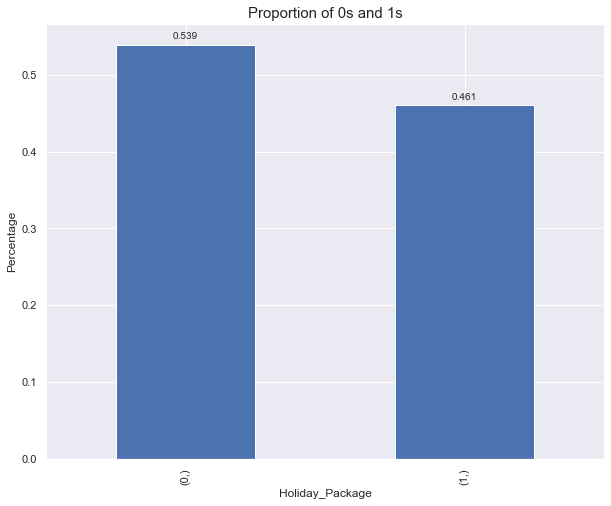

In [36]:

plt.figure(figsize=(10,8))
prop=y_train.value_counts(normalize=True)
prop_plt=prop.plot(kind='bar')
plt.ylabel("Percentage")
plt.title("Proportion of 0s and 1s",fontdict={'fontsize':15})
for bar in prop_plt.patches:
            prop_plt.annotate(format(bar.get_height(),'.3f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=10,xytext=(0,8),textcoords='offset pixels')

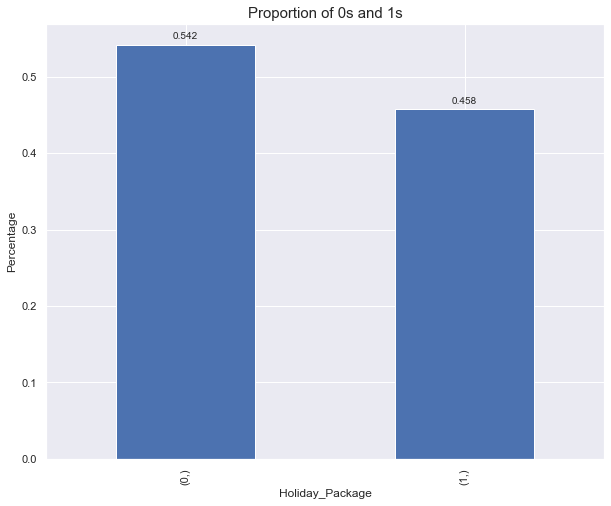

In [37]:
b=y_test.value_counts(normalize=True)

plt.figure(figsize=(10,8))
prop=y_test.value_counts(normalize=True)
prop_plt=prop.plot(kind='bar')
plt.ylabel("Percentage")
plt.title("Proportion of 0s and 1s",fontdict={'fontsize':15})
for bar in prop_plt.patches:
            prop_plt.annotate(format(bar.get_height(),'.3f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=10,xytext=(0,8),textcoords='offset pixels')

In [38]:
# Fit the Logistic Regression model
model = LogisticRegression(C=1.0, fit_intercept=True,solver='liblinear',intercept_scaling=2,max_iter=10000,verbose=False,n_jobs=3, warm_start=False)
model.fit(X_train, y_train)

LogisticRegression(intercept_scaling=2, max_iter=10000, n_jobs=3,
                   solver='liblinear', verbose=False)

In [39]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [40]:
ytest_predict_prob=model.predict_proba(X_test)

In [41]:
lg_train_acc=model.score(X_train, y_train)
lg_train_acc

0.5245901639344263

In [42]:
lg_test_acc=model.score(X_test, y_test)
lg_test_acc

0.5305343511450382

In [43]:
print('Intercept :' ,model.intercept_[0] )
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))
    

Intercept : 0.0022655560705491617
The coefficient for Salary is -1.0205419968283937e-05
The coefficient for Age is 0.005811492339722254
The coefficient for Educ is 0.0035090039940050485
The coefficient for No_young_children is -0.0013438036485187302
The coefficient for No_older_children is 0.0018004311926397565
The coefficient for Foreign is 0.0014085127644074447


In [44]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.54      0.90      0.67       329
           1       0.42      0.09      0.14       281

    accuracy                           0.52       610
   macro avg       0.48      0.49      0.41       610
weighted avg       0.48      0.52      0.43       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.54      0.89      0.67       142
           1       0.44      0.10      0.16       120

    accuracy                           0.53       262
   macro avg       0.49      0.50      0.42       262
weighted avg       0.50      0.53      0.44       262
 



AUC for Train dataset: 0.576
AUC for test dataset: 0.610


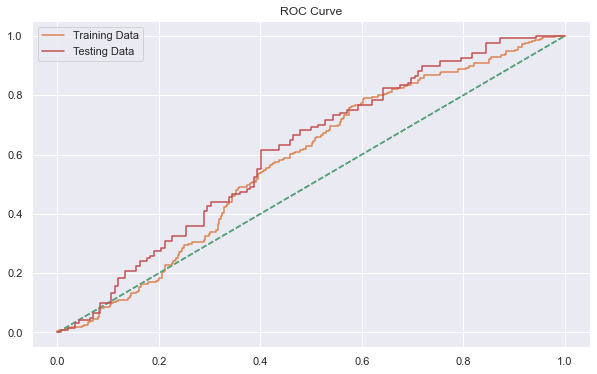

In [45]:
plt.figure(figsize=(10,6))
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC


# predict probabilities
probs_train = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
lg_train_auc = roc_auc_score(y_train, probs)
print('AUC for Train dataset: %.3f' % lg_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
lg_test_auc = roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % lg_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

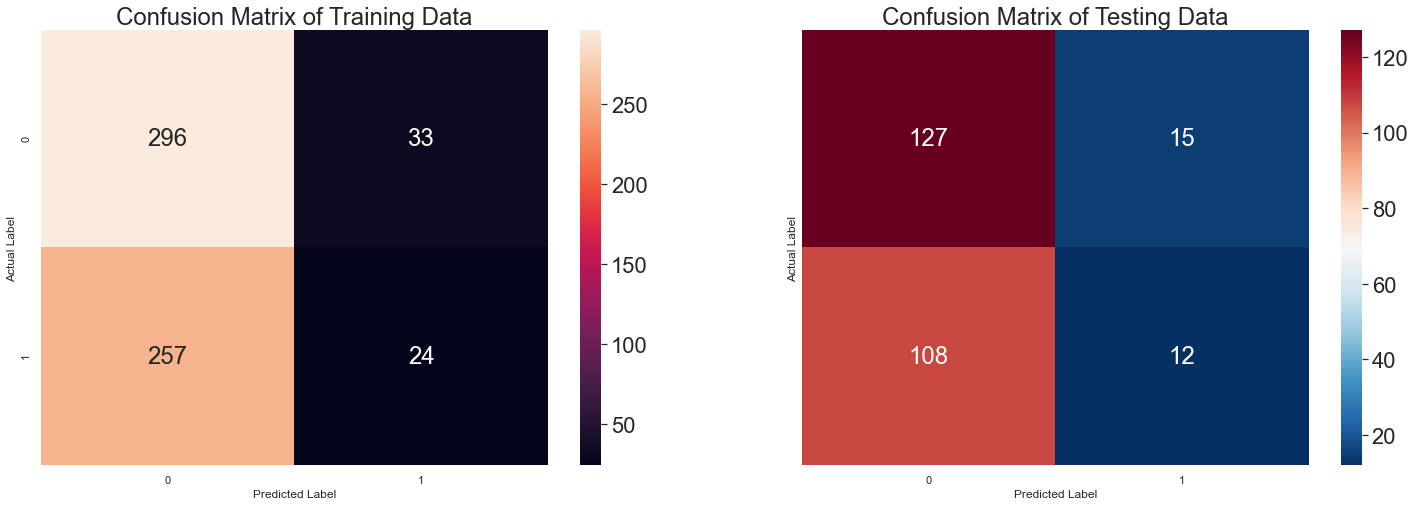

In [46]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (25,8))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='RdBu_r',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

In [47]:
grid={'penalty':['l2','l1','none'],
      'solver':['liblinear','sag','lbfgs','newton-cg'],
      'tol':[0.01,0.0001],
     'C': [100, 10, 1.0, 0.01]}

In [48]:
lr_model = LogisticRegression(max_iter=1000,n_jobs=-1,C=1
                             )

In [49]:
grid_search = GridSearchCV(estimator = lr_model, param_grid = grid, cv = 2,n_jobs=-1,scoring='f1',)

In [50]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(C=1, max_iter=1000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.01],
                         'penalty': ['l2', 'l1', 'none'],
                         'solver': ['liblinear', 'sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.01, 0.0001]},
             scoring='f1')

In [51]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.01}

In [52]:
grid_search.best_estimator_

LogisticRegression(C=100, max_iter=1000, n_jobs=-1, solver='newton-cg',
                   tol=0.01)

In [53]:
best_model = grid_search.best_estimator_

In [54]:
ytrain_predict_gr = best_model.predict(X_train)
ytest_predict_gr = best_model.predict(X_test)

In [55]:
lg_train_acc_gr=best_model.score(X_train, y_train)
lg_train_acc_gr

0.6672131147540984

In [56]:
lg_test_acc_gr=best_model.score(X_test, y_test)
lg_test_acc_gr

0.6526717557251909

In [57]:
ytest_predict_prob_gr=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.472262,0.527738
1,0.566799,0.433201
2,0.480734,0.519266
3,0.536143,0.463857
4,0.565368,0.434632


In [58]:
print('Intercept :' ,best_model.intercept_[0] )
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_model.coef_[0][idx]))
    

Intercept : 2.4619115856162623
The coefficient for Salary is -1.64606874292532e-05
The coefficient for Age is -0.057052953562921324
The coefficient for Educ is 0.060304468895405826
The coefficient for No_young_children is -1.3481535900382278
The coefficient for No_older_children is -0.04883732008015719
The coefficient for Foreign is 1.265715477643758


AUC for Train dataset: 0.735
AUC for test dataset: 0.717


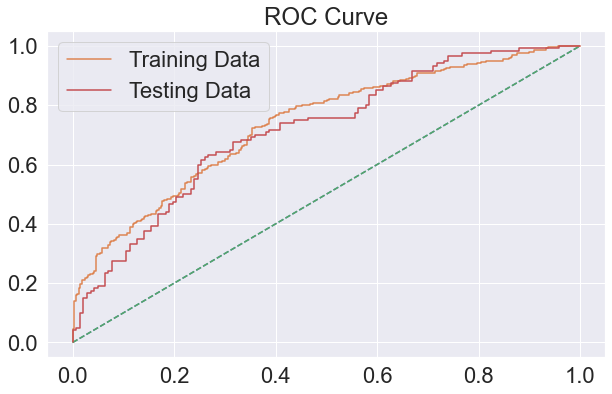

In [59]:
plt.figure(figsize=(10,6))
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC


# predict probabilities
probs_train = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
lg_train_auc_gr = roc_auc_score(y_train, probs)
print('AUC for Train dataset: %.3f' % lg_train_auc_gr)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
lg_test_auc_gr = roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % lg_test_auc_gr)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [60]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_gr),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_gr),'\n')



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



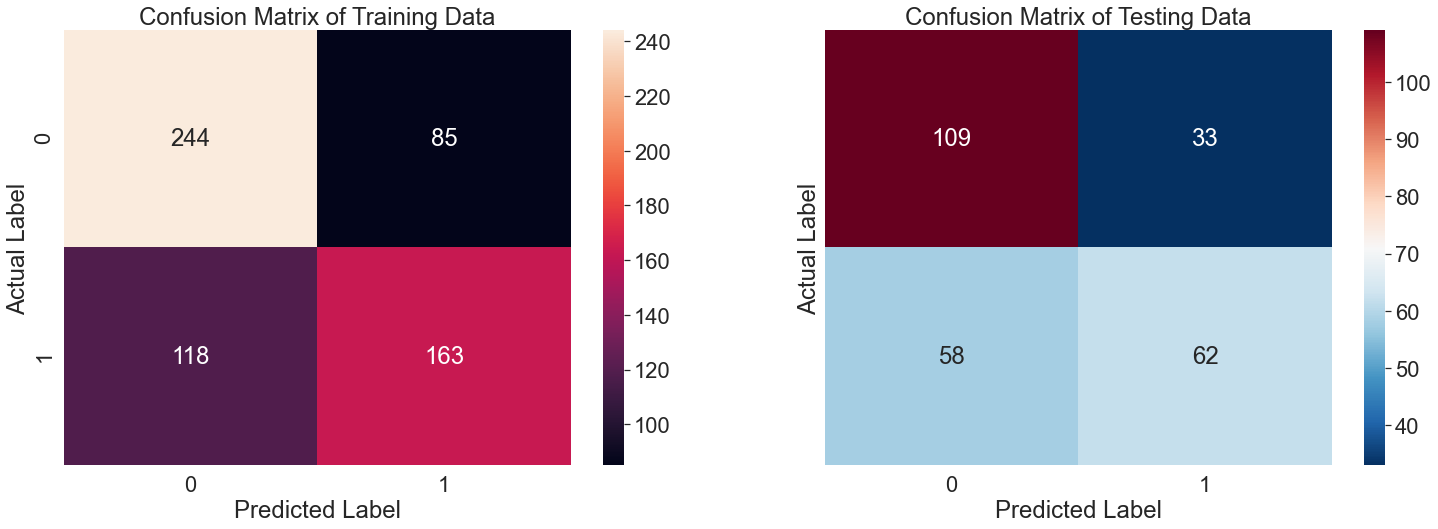

In [61]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (25,8))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_gr)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_gr)),annot=True,fmt='.5g',cmap='RdBu_r',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

In [62]:
lg_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
lg_metrics

{'0': {'precision': 0.5352622061482821,
  'recall': 0.8996960486322189,
  'f1-score': 0.6712018140589568,
  'support': 329},
 '1': {'precision': 0.42105263157894735,
  'recall': 0.08540925266903915,
  'f1-score': 0.14201183431952666,
  'support': 281},
 'accuracy': 0.5245901639344263,
 'macro avg': {'precision': 0.47815741886361474,
  'recall': 0.49255265065062903,
  'f1-score': 0.40660682418924177,
  'support': 610},
 'weighted avg': {'precision': 0.48265091032208035,
  'recall': 0.5245901639344263,
  'f1-score': 0.42742741355603897,
  'support': 610}}

In [63]:
#base model - train
lg_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lg_metrics).transpose()
lg_train_f1=round(df.loc["1"][2],2)
lg_train_recall=round(df.loc["1"][1],2)
lg_train_precision=round(df.loc["1"][0],2)
print ('lg_train_precision ',lg_train_precision)
print ('lg_train_recall ',lg_train_recall)
print ('lg_train_f1 ',lg_train_f1)

lg_train_precision  0.42
lg_train_recall  0.09
lg_train_f1  0.14


In [64]:
classification_report(y_train, ytrain_predict,output_dict=True)

{'0': {'precision': 0.5352622061482821,
  'recall': 0.8996960486322189,
  'f1-score': 0.6712018140589568,
  'support': 329},
 '1': {'precision': 0.42105263157894735,
  'recall': 0.08540925266903915,
  'f1-score': 0.14201183431952666,
  'support': 281},
 'accuracy': 0.5245901639344263,
 'macro avg': {'precision': 0.47815741886361474,
  'recall': 0.49255265065062903,
  'f1-score': 0.40660682418924177,
  'support': 610},
 'weighted avg': {'precision': 0.48265091032208035,
  'recall': 0.5245901639344263,
  'f1-score': 0.42742741355603897,
  'support': 610}}

In [65]:
#base model - test
lg_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lg_metrics).transpose()
lg_test_f1=round(df.loc["1"][2],2)
lg_test_recall=round(df.loc["1"][1],2)
lg_test_precision=round(df.loc["1"][0],2)
print ('lg_test_precision ',lg_test_precision)
print ('lg_test_recall ',lg_test_recall)
print ('lg_test_f1 ',lg_test_f1)

lg_test_precision  0.44
lg_test_recall  0.1
lg_test_f1  0.16


In [66]:
#Grid search model - train
lg_metrics=classification_report(y_train, ytrain_predict_gr,output_dict=True)
df=pd.DataFrame(lg_metrics).transpose()
lg_train_f1_gr=round(df.loc["1"][2],2)
lg_train_recall_gr=round(df.loc["1"][1],2)
lg_train_precision_gr=round(df.loc["1"][0],2)
print ('lg_train_precision ',lg_train_precision_gr)
print ('lg_train_recall ',lg_train_recall_gr)
print ('lg_train_f1 ',lg_train_f1_gr)

lg_train_precision  0.66
lg_train_recall  0.58
lg_train_f1  0.62


In [67]:
#Grid search model - test
lg_metrics=classification_report(y_test, ytest_predict_gr,output_dict=True)
df=pd.DataFrame(lg_metrics).transpose()
lg_test_f1_gr=round(df.loc["1"][2],2)
lg_test_recall_gr=round(df.loc["1"][1],2)
lg_test_precision_gr=round(df.loc["1"][0],2)
print ('lg_test_precision ',lg_test_precision_gr)
print ('lg_test_recall',lg_test_recall_gr)
print ('lg_test_f1 ',lg_test_f1_gr)

lg_test_precision  0.65
lg_test_recall 0.52
lg_test_f1  0.58


## LDA

In [68]:
#Build LDA Model
clf = LinearDiscriminantAnalysis(shrinkage=None,priors=None)
model=clf.fit(X_train,y_train)

In [69]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [70]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')


Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



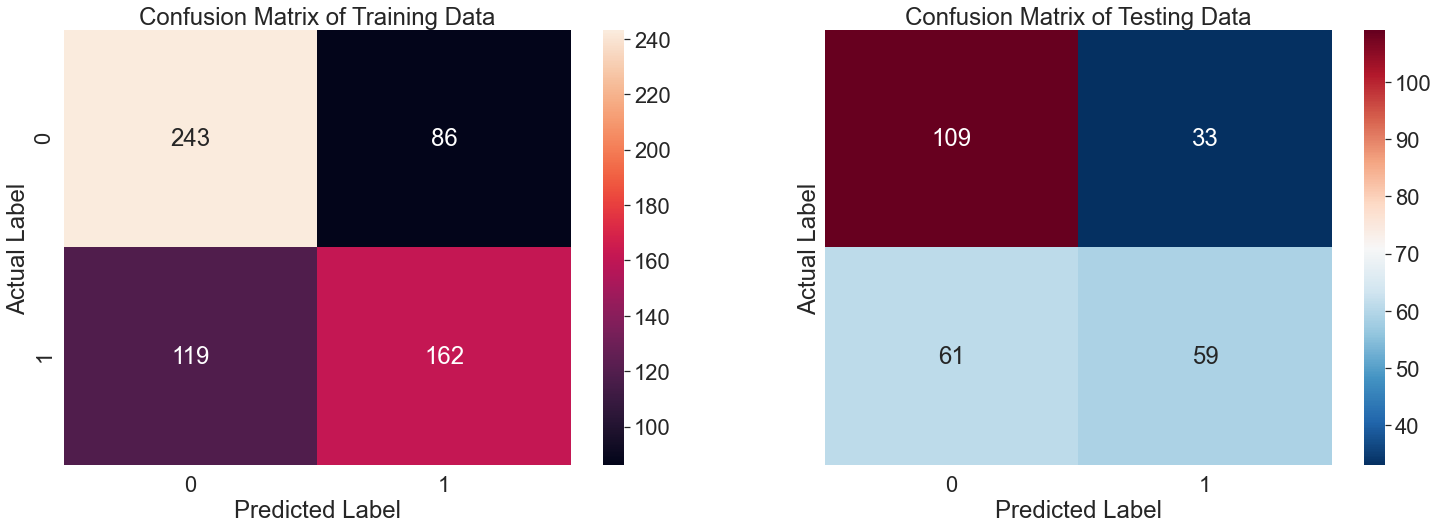

In [71]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (25,8))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='RdBu_r',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

In [72]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


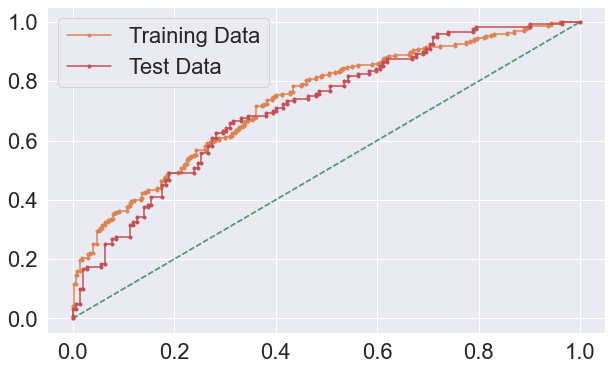

In [73]:
# AUC and ROC for the training data
plt.figure(figsize=(10,6))
# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [74]:
lda_train_acc=metrics.accuracy_score(y_train,pred_class_train)
lda_train_acc

0.6639344262295082

In [75]:
lda_test_acc=metrics.accuracy_score(y_test,pred_class_test)
lda_test_acc

0.6412213740458015

0.1 

Accuracy Score 0.482
F1 Score 0.6393 

Confusion Matrix


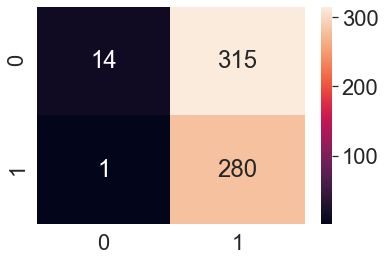

0.2 

Accuracy Score 0.5213
F1 Score 0.6499 

Confusion Matrix


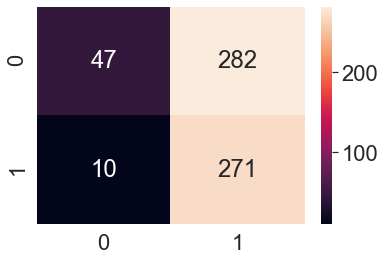

0.3 

Accuracy Score 0.5934
F1 Score 0.6693 

Confusion Matrix


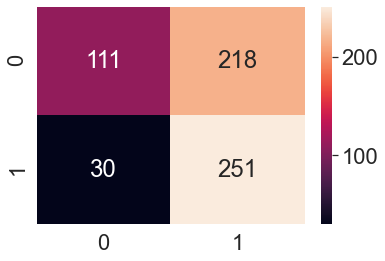

0.4 

Accuracy Score 0.6656
F1 Score 0.6762 

Confusion Matrix


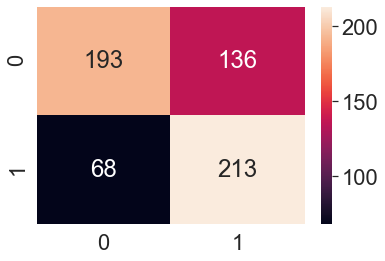

0.5 

Accuracy Score 0.6639
F1 Score 0.6125 

Confusion Matrix


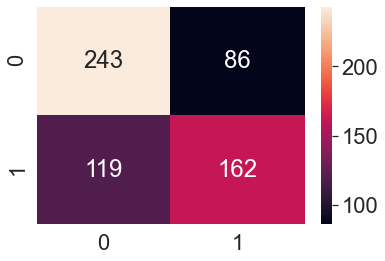

0.6 

Accuracy Score 0.659
F1 Score 0.5336 

Confusion Matrix


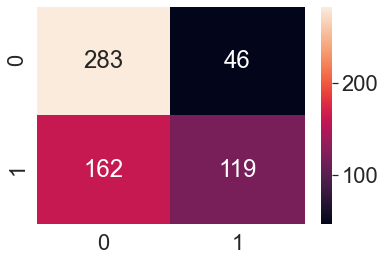

0.7 

Accuracy Score 0.6492
F1 Score 0.4398 

Confusion Matrix


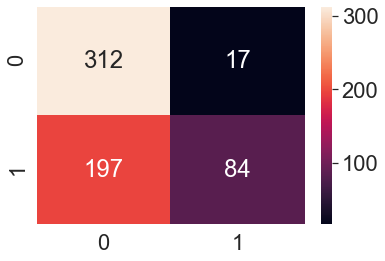

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


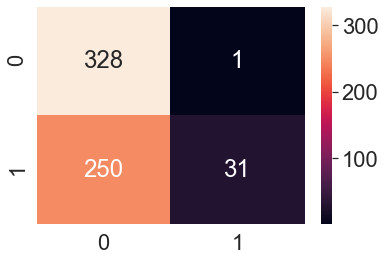

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


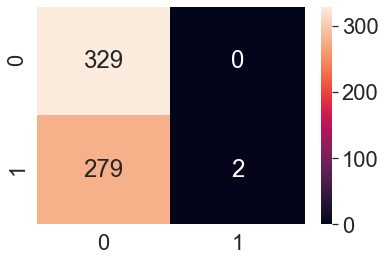

In [76]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [77]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

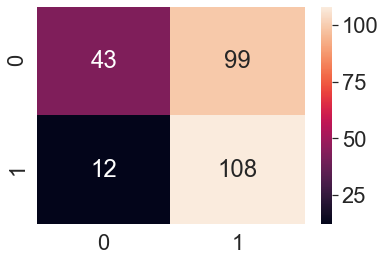

In [78]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g');


In [79]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.78      0.30      0.44       142
           1       0.52      0.90      0.66       120

    accuracy                           0.58       262
   macro avg       0.65      0.60      0.55       262
weighted avg       0.66      0.58      0.54       262
 



In [80]:
estimator_1 = LinearDiscriminantAnalysis(shrinkage='auto',tol=0.01)
parameters_1 = {
    'solver': ('lsqr','eigen'), 
    'n_components': (0,1,5),
   
                   }
# with GridSearch
grid_search_lda = GridSearchCV(
    estimator=estimator_1,
    param_grid=parameters_1,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 3,
)



In [81]:
lda=grid_search_lda.fit(X_train, y_train)

y_pred_1 =lda.predict(X_train)
y_pred_2 =lda.predict(X_test)

In [82]:
lda_train_acc_gr=metrics.accuracy_score(y_train,y_pred_1)
lda_train_acc_gr

0.6688524590163935

In [83]:
lda_test_acc_gr=metrics.accuracy_score(y_test,y_pred_2)
lda_test_acc_gr

0.6641221374045801

In [84]:
lda.best_estimator_

LinearDiscriminantAnalysis(n_components=0, shrinkage='auto', solver='lsqr',
                           tol=0.01)

In [85]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_pred_1),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_pred_2),'\n')




Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.78      0.72       142
           1       0.67      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.67      0.65      0.65       262
weighted avg       0.67      0.66      0.66       262
 



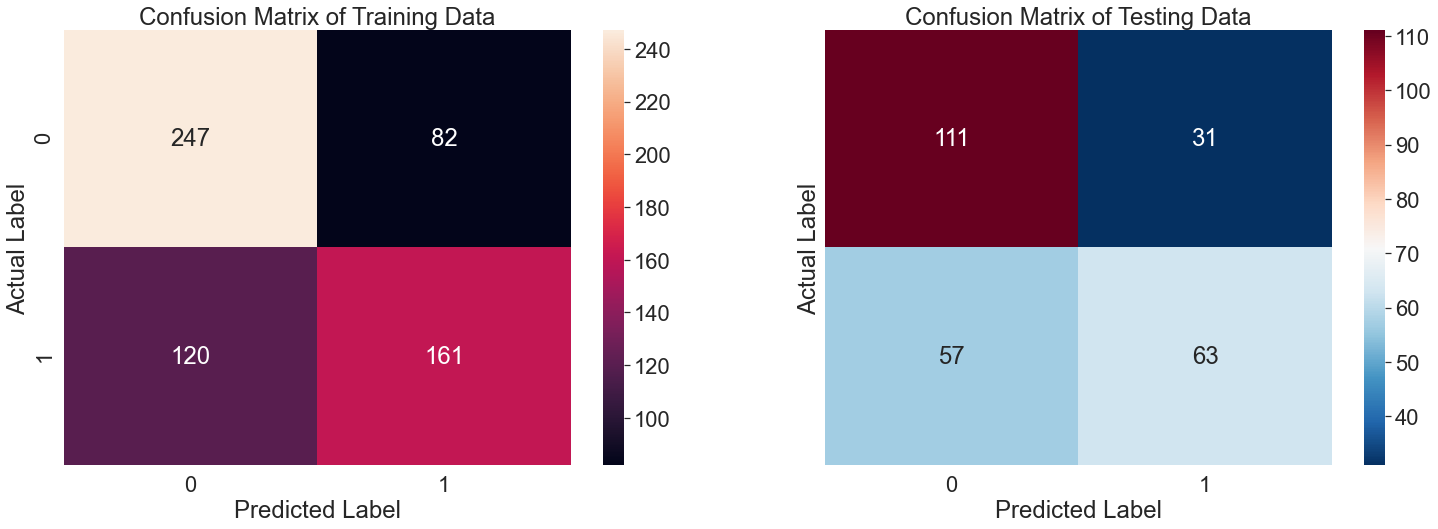

In [86]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (25,8))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_pred_1)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_pred_2)),annot=True,fmt='.5g',cmap='RdBu_r',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

In [87]:
# Training Data Probability Prediction
pred_prob_train = lda.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = lda.predict_proba(X_test)


AUC for the Training Data: 0.732
AUC for the Test Data: 0.720


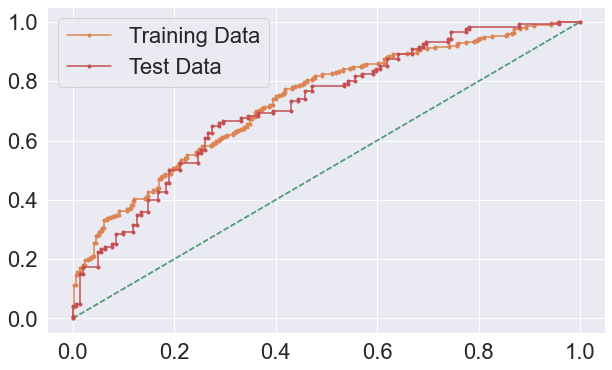

In [88]:
# AUC and ROC for the training data
plt.figure(figsize=(10,6))
# calculate AUC
lda_train_auc_gr = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc_gr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc_gr = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc_gr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [89]:
#base model - train
lda_metrics=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)


lda_train_precision  0.65
lda_train_recall  0.58
lda_train_f1  0.61


In [90]:
#base model - test

lda_metrics=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.64
lda_test_recall  0.49
lda_test_f1  0.56


In [91]:
#model with Grid Search - train
lda_metrics=classification_report(y_train, y_pred_1,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1_gr=round(df.loc["1"][2],2)
lda_train_recall_gr=round(df.loc["1"][1],2)
lda_train_precision_gr=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision_gr)
print ('lda_train_recall ',lda_train_recall_gr)
print ('lda_train_f1 ',lda_train_f1_gr)



lda_train_precision  0.66
lda_train_recall  0.57
lda_train_f1  0.61


In [92]:
#model with Grid Search - test

lda_metrics=classification_report(y_test, y_pred_2,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1_gr=round(df.loc["1"][2],2)
lda_test_recall_gr=round(df.loc["1"][1],2)
lda_test_precision_gr=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision_gr)
print ('lda_test_recall ',lda_test_recall_gr)
print ('lda_test_f1 ',lda_test_f1_gr)

lda_test_precision  0.67
lda_test_recall  0.52
lda_test_f1  0.59


In [93]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lg_train_acc,lg_train_auc,lg_train_recall,lg_train_precision,lg_train_f1],
        'LR Test':[lg_test_acc,lg_test_auc,lg_test_recall,lg_test_precision,lg_test_f1],
          'LR Train GridSearch':[lg_train_acc_gr,lg_train_auc_gr,lg_train_recall_gr,lg_train_precision_gr,lg_train_f1_gr],
           'LR Test GridSearch':[lg_test_acc_gr,lg_test_auc_gr,lg_test_recall_gr,lg_test_precision_gr,lg_test_f1_gr],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
         'LDA Train GridSearch':[lda_train_acc_gr,lda_train_auc_gr,lda_train_recall_gr,lda_train_precision_gr,lda_train_f1_gr],
             'LDA Test GridSearch':[lda_test_acc_gr,lda_test_auc_gr,lda_test_recall_gr,lda_test_precision_gr,lda_test_f1_gr],},index=index)
data.columns=pd.MultiIndex.from_arrays([['LR','LR','LR','LR','LDA','LDA','LDA','LDA'],['Train','Test','Train GridSearch','Test GridSearch','Train','Test','Train GridSearch','Test GridSearch']])
round(data,3)

LR                                            LDA         \
           Train   Test Train GridSearch Test GridSearch  Train   Test   
Accuracy   0.525  0.531            0.667           0.653  0.664  0.641   
AUC        0.576  0.610            0.735           0.717  0.733  0.714   
Recall     0.090  0.100            0.580           0.520  0.580  0.490   
Precision  0.420  0.440            0.660           0.650  0.650  0.640   
F1 Score   0.140  0.160            0.620           0.580  0.610  0.560   

                                            
          Train GridSearch Test GridSearch  
Accuracy             0.669           0.664  
AUC                  0.732           0.720  
Recall               0.570           0.520  
Precision            0.660           0.670  
F1 Score             0.610           0.590